In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

In [29]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

def preprocess(design_matrix):
    return design_matrix.astype('float32') / 255

x_train = preprocess(x_train)
x_test = preprocess(x_test)

In [36]:
class Autoencoder(keras.Model):
    def __init__(self, latent_dim=64):
        super(Autoencoder, self).__init__()
        self.encoder = keras.Sequential([
            keras.layers.Flatten(),
            keras.layers.Dense(latent_dim, activation='relu')
        ])
        self.decoder = keras.Sequential([
            keras.layers.Dense(784, activation='sigmoid'),
            keras.layers.Reshape((28, 28))
        ])
    
    def call(self, x):
        encoded = self.encoder(x)
        return self.decoder(encoded)

autoencoder = Autoencoder(latent_dim=32)

Prove:

1. vedere cosa accade modificando il valore di `latent_dim`;
2. vedere cosa accade modificando l'algoritmo di ottimizzazione da `Adam` ad `SGD`.

In [37]:
autoencoder.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.MeanSquaredError()
)

In [38]:
autoencoder.fit(
    x_train,
    x_train,
    epochs=10,
    shuffle=True,
    validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 2s 816us/step - loss: 0.0323 - val_loss: 0.0159
Epoch 2/10
1875/1875 [==============================] - 2s 814us/step - loss: 0.0132 - val_loss: 0.0112
Epoch 3/10
1875/1875 [==============================] - 1s 776us/step - loss: 0.0111 - val_loss: 0.0104
Epoch 4/10
1875/1875 [==============================] - 1s 776us/step - loss: 0.0107 - val_loss: 0.0103
Epoch 5/10
1875/1875 [==============================] - 1s 783us/step - loss: 0.0105 - val_loss: 0.0101
Epoch 6/10
1875/1875 [==============================] - 1s 778us/step - loss: 0.0104 - val_loss: 0.0100
Epoch 7/10
1875/1875 [==============================] - 1s 775us/step - loss: 0.0104 - val_loss: 0.0100
Epoch 8/10
1875/1875 [==============================] - 1s 771us/step - loss: 0.0103 - val_loss: 0.0100
Epoch 9/10
1875/1875 [==============================] - 1s 773us/step - loss: 0.0103 - val_loss: 0.0099
Epoch 10/10
1875/1875 [==============================] - 1s 769u

In [39]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

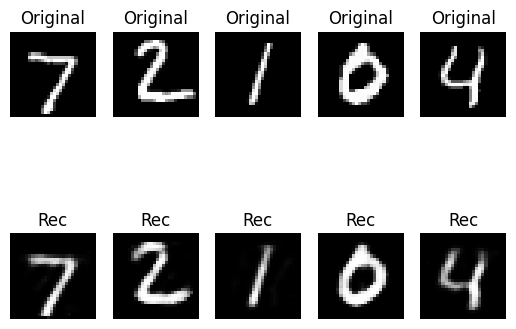

In [40]:
plt.figure()

for i in range(5):
    # original
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title('Original')
    plt.axis('off')
    # reconstruction
    ax = plt.subplot(2, 5, i+1+5)
    plt.imshow(decoded_imgs[i], cmap='gray')
    plt.title('Rec')
    plt.axis('off')
plt.show()